In [71]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
# import seaborn as sns
df = pd.read_excel('WarnaFlipNonFlipFusi.xlsx')
# df.drop(['file','energy_0','homogenity_0','entrophy_0','contrast_0','energy_45','homogenity_45','entrophy_45','contrast_45','energy_90','homogenity_90','entrophy_90','contrast_90','energy_135','homogenity_135','entrophy_135','contrast_135'],axis=1, inplace=True)
df.drop('file', axis=1, inplace=True)
df.head()

,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,homogenity_90,...,energy_135,homogenity_135,entrophy_135,contrast_135,fusi_energy,fusi_homogenity,fusi_entrophy,fusi_contrast,kelas,Unnamed: 22
0,0.240005,331.516238,4.742113,330.516238,0.231082,818.749884,4.973207,817.749884,0.236720,545.250246,...,0.231363,645.163841,4.930189,644.163841,0.939170,2340.680209,19.511409,2336.680209,fighter,NaN
1,0.239120,331.866391,4.726771,330.866391,0.230489,646.219577,4.904769,645.219577,0.234241,546.284172,...,0.230034,819.911965,4.948246,818.911965,0.933884,2344.282105,19.432075,2340.282105,fighter,NaN
2,0.497151,258.925613,2.885148,257.925613,0.494105,423.701868,2.968974,422.701868,0.495796,329.489604,...,0.494588,387.862004,2.941243,386.862004,1.981640,1399.979089,11.684273,1395.979089,fighter,NaN
3,0.497625,258.919608,2.881818,257.919608,0.495238,387.868396,2.938185,386.868396,0.496315,329.510611,...,0.494755,423.740250,2.965840,422.740250,1.983933,1400.038865,11.671823,1396.038865,fighter,NaN
4,0.355096,553.787439,3.759853,552.787439,0.340568,1170.322094,3.933239,1169.322094,0.347928,871.335445,...,0.340877,1065.101096,3.899414,1064.101096,1.384469,3660.546074,15.420127,3656.546074,fighter,NaN


In [72]:
# Encoding categorical data
# label_encoder = preprocessing.LabelEncoder()
# df['kelas'] = label_encoder.fit_transform(df['kelas'])

## split target and data 
# properties = list(df.columns.values)
# properties.remove('kelas')
# print(properties)
# X = df[properties]
# y = df['kelas']

## split target and data
# X = df.iloc[:,:-1]
y = df.loc[:, lambda df:['kelas']]

## split target and data
# feature_cols = ["energy_0","homogenity_0","entrophy_0","contrast_0"
#                 ,"energy_45","homogenity_45","entrophy_45","contrast_45"
#                 ,"energy_90","homogenity_90","entrophy_90","contrast_90"
#                 ,"energy_135","homogenity_135","entrophy_135","contrast_135"
#                 ,"fusi_energy","fusi_homogenity","fusi_entrophy","fusi_contrast"]
feature_cols = ["fusi_energy","fusi_homogenity","fusi_entrophy","fusi_contrast"]

X = df[feature_cols]
# y = df.kelas

X

,fusi_energy,fusi_homogenity,fusi_entrophy,fusi_contrast
0,0.939170,2340.680209,19.511409,2336.680209
1,0.933884,2344.282105,19.432075,2340.282105
2,1.981640,1399.979089,11.684273,1395.979089
3,1.983933,1400.038865,11.671823,1396.038865
4,1.384469,3660.546074,15.420127,3656.546074
...,...,...,...,...
2043,1.801781,2942.099942,13.508116,2938.099942
2044,1.832663,2124.943591,13.020960,2120.943591
2045,1.814780,2125.250680,13.084556,2121.250680
2046,1.471923,3858.694772,16.240382,3854.694772


In [73]:
y

,kelas
0,fighter
1,fighter
2,fighter
3,fighter
4,fighter
...,...
2043,attacker
2044,attacker
2045,attacker
2046,attacker


In [74]:
y["kelas"].value_counts()

fighter     1090
attacker     958
Name: kelas, dtype: int64

In [75]:
# cleanup_kelas = {"kelas" :{"attacker":0, "fighter"=1}}

In [76]:
# # seperti 1 hot, direplace menjadi 1 kelas
# y["kelas"] = np.where(y["kelas"].str.contains("fighter"), 1, 0)


In [77]:
# display(y.to_string())


In [78]:
# from sklearn.preprocessing import OneHotEncoder

# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(y[["kelas"]])
# pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [80]:
# standartscaler
from sklearn.preprocessing import StandardScaler
# StdScaler = MinMaxScaler(feature_range=(-1,1))
StdScaler = StandardScaler()
StdScaler.fit(X_train)

StandardScaler()

In [81]:
# scaler = preprocessing.MinMaxScaler()
# names = X.columns
# X_tr, X_ts, X_vl = scaler.fit_transform(X_train), scaler.fit_transform(X_test), scaler.fit_transform(X_val)
# X_train, X_test, X_val = pd.DataFrame(X_tr, columns=names), pd.DataFrame(X_ts, columns=names), pd.DataFrame(X_vl, columns=names)
# X_train
X_train1 = StdScaler.transform(X_train).min(axis=0)
X_train2 = StdScaler.transform(X_train).max(axis=0)
X_train3 = StdScaler.transform(X_train).mean(axis=0)
X_train4 = StdScaler.transform(X_train).std(axis=0)
X_train = StdScaler.transform(X_train)


X_test = StdScaler.transform(X_test)
# X_val = StdScaler.transform(X_val)

In [82]:
X_train1

array([-2.91300868, -1.63593725, -3.40796529, -1.63593725])

In [83]:
X_train2

array([4.0558829 , 4.31481139, 3.13009328, 4.31481139])

In [84]:
X_train3

array([-3.95288198e-16, -2.79250236e-16, -3.90408097e-17,  6.50680161e-17])

In [85]:
print(X_train4)

[1. 1. 1. 1.]


In [86]:
# #testing nilai murni tidak pakai standart scaler
# #sekarang pake stdscl
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
names = X.columns
# X_tr, X_ts, X_vl = scaler.fit_transform(X_train), scaler.fit_transform(X_test), scaler.fit_transform(X_val)
X_train, X_test = pd.DataFrame(X_train, columns=names), pd.DataFrame(X_test, columns=names)
# # X_train

# # print(X_train['fusi_energy'])

In [87]:
X_train

,fusi_energy,fusi_homogenity,fusi_entrophy,fusi_contrast
0,-0.299754,0.311370,0.716036,0.311370
1,-0.173954,-0.454333,0.217408,-0.454333
2,-1.334228,1.864018,1.180889,1.864018
3,0.956148,0.135050,-0.881339,0.135050
4,-1.806891,4.314811,1.931746,4.314811
...,...,...,...,...
1633,-0.738231,0.622834,0.843801,0.622834
1634,1.190851,-1.217124,-1.422815,-1.217124
1635,0.877176,-0.351207,-0.529882,-0.351207
1636,-0.170739,0.179048,0.328410,0.179048


In [88]:
# X_val

In [89]:
y_train.value_counts()

kelas   
fighter     872
attacker    766
dtype: int64

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [91]:
y_train_res.value_counts()

kelas   
attacker    872
fighter     872
dtype: int64

In [92]:
#change to multiclass target
y_train_enc, y_test_enc = pd.get_dummies(y_train_res), pd.get_dummies(y_test)
# y_train_enc

In [93]:
X_train

,fusi_energy,fusi_homogenity,fusi_entrophy,fusi_contrast
0,-0.299754,0.311370,0.716036,0.311370
1,-0.173954,-0.454333,0.217408,-0.454333
2,-1.334228,1.864018,1.180889,1.864018
3,0.956148,0.135050,-0.881339,0.135050
4,-1.806891,4.314811,1.931746,4.314811
...,...,...,...,...
1633,-0.738231,0.622834,0.843801,0.622834
1634,1.190851,-1.217124,-1.422815,-1.217124
1635,0.877176,-0.351207,-0.529882,-0.351207
1636,-0.170739,0.179048,0.328410,0.179048


In [94]:
X_train_res

,fusi_energy,fusi_homogenity,fusi_entrophy,fusi_contrast
0,-0.299754,0.311370,0.716036,0.311370
1,-0.173954,-0.454333,0.217408,-0.454333
2,-1.334228,1.864018,1.180889,1.864018
3,0.956148,0.135050,-0.881339,0.135050
4,-1.806891,4.314811,1.931746,4.314811
...,...,...,...,...
1739,-0.215889,-0.262252,0.430279,-0.262252
1740,-0.761711,-0.999912,0.325459,-0.999912
1741,-0.293512,0.985337,0.547661,0.985337
1742,1.010788,-0.673425,-0.696847,-0.673425


In [95]:
# y_train_enc

In [96]:
X_test

,fusi_energy,fusi_homogenity,fusi_entrophy,fusi_contrast
0,-0.102136,-0.558720,-0.173665,-0.558720
1,-2.029469,1.646339,1.963668,1.646339
2,-0.855272,0.477538,1.187566,0.477538
3,-1.877403,-0.044028,2.024061,-0.044028
4,-0.323692,-0.875389,0.173394,-0.875389
...,...,...,...,...
405,1.283748,0.032576,-0.959957,0.032576
406,0.022699,0.469231,0.075058,0.469231
407,0.705398,-0.802158,-0.618734,-0.802158
408,0.455148,-1.021590,-0.646230,-1.021590


In [97]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='softmax'))
# model.add(Dense(1, activation='sigmoid'))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=35)

# opt = SGD(lr=0.4, momentum=0.9)
# binarycr = tf.keras.losses.BinaryCrossentropy(
#     from_logits=False,
#     label_smoothing=0.0,
#     axis=-1,
#     reduction="auto",
#     name="binary_crossentropy",
# )
# model.compile(loss=binarycr, optimizer=opt, metrics=['accuracy'])
catcros = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy",
)
model.compile(loss=catcros, optimizer='Adam', metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 2)                 514       
                                                                 
Total params: 42,178
Trainable params: 42,178
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(X_train_res, y_train_enc, validation_data=(X_test, y_test_enc), batch_size=32,epochs=555, callbacks=[callback])
# history = model.fit(X_train_res, y_train_enc, batch_size=16, epochs=100)

Epoch 1/555
55/55 [==============================] - 1s 8ms/step - loss: 1.9498 - accuracy: 0.5969 - val_loss: 1.8674 - val_accuracy: 0.5805
Epoch 2/555
55/55 [==============================] - 0s 4ms/step - loss: 1.7660 - accuracy: 0.6353 - val_loss: 1.7422 - val_accuracy: 0.5902
Epoch 3/555
55/55 [==============================] - 0s 4ms/step - loss: 1.6381 - accuracy: 0.6456 - val_loss: 1.6046 - val_accuracy: 0.5927
Epoch 4/555
55/55 [==============================] - 0s 4ms/step - loss: 1.5100 - accuracy: 0.6565 - val_loss: 1.5101 - val_accuracy: 0.5951
Epoch 5/555
55/55 [==============================] - 0s 3ms/step - loss: 1.4160 - accuracy: 0.6634 - val_loss: 1.4049 - val_accuracy: 0.5951
Epoch 6/555
55/55 [==============================] - 0s 4ms/step - loss: 1.3212 - accuracy: 0.6674 - val_loss: 1.3087 - val_accuracy: 0.6293
Epoch 7/555
55/55 [==============================] - 0s 4ms/step - loss: 1.2375 - accuracy: 0.6737 - val_loss: 1.2385 - val_accuracy: 0.6073
Epoch 8/555
5

In [100]:
# _, train_acc = model.evaluate(X_train_res, y_train_enc, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)

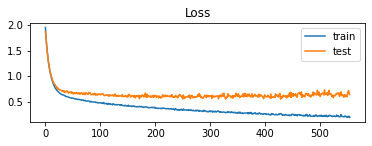

In [101]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


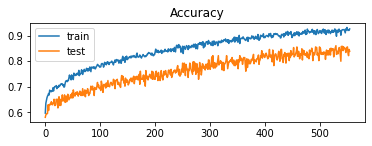

In [102]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
# plt.xlim(0,400)
plt.legend()

In [103]:
# # plot accuracy during training
# plt.subplot(212)
# plt.title('Accuracy')
# plt.plot(history.history['accuracy'], label='train')
# # plt.plot(history.history['val_accuracy'], label='test')
# plt.legend()
# plt.show()

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [105]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

In [106]:
y_pred_enc = pd.get_dummies(y_pred)
y_test_enc = pd.get_dummies(y_test_enc)

y_test_value, y_pred_value = y_test_enc.values.argmax(axis=1), y_pred_enc.values.argmax(axis=1)

In [107]:
print(accuracy_score(y_test_value, y_pred_value))

0.8390243902439024


In [108]:
# # y_pred_enc = pd.get_dummies(y_pred)
# # y_test_enc = pd.get_dummies(y_test)

# y_test_value, y_pred_value = y_test.values.argmax(axis=1), y_pred.values.argmax(axis=1)

softmax - relu


relu - softmax
- test 2 = 0.5658536585365853 (dense1 50 epoch 100)
- test 3 = 0.5954325436457234 (dense1 50 epoch 200)
-
- ALL GLCM + Fusi
- test 4 = 0.6585365853658537 (dense2 32 64 epoch 50)
- test 5 = 0.6682926829268293 (dense2 32 64 epoch 100)
- test 6 = 0.675609756097561 (dense2 32 64 epoch 200)
- test 7 = 0.6829268292682927 (dense2 32 64 epoch 300)
- test 8 = 0.6685352342423534 (dense2 32 128 epoch 50)
- test 9 = 0.6780487804878049 (dense2 32 128 epoch 500)
- test 10 = 0.6878048780487804 (dense2 32 128 epoch 1000)
-
- fusi
- test 11 = 0.697560975609756 (dense 3 64 128 256 epoch 750)
- test 12 = 0.665 (dense 3 32 64 128 epoch 750)
- 
- warna 
- Fusi (glcm+)
- dense 1
- 0.6804878048780488 (dense1 50 epoch 100)
- 0.7268292682926829 (dense1 50 epoch 250)
- 0.7097560975609756 (dense1 50 epoch 500)
- 0.7317073170731707 (dense1 50 epoch 750)
- 0.7048780487804878 (dense1 50 epoch 1000)
- 
- 0.7146341463414634 (dense1 100 epoch 100)
- 0.7048780487804878 (dense1 100 epoch 250)
- 0.7390243902439024 (dense1 100 epoch 500)
- 0.7414634146341463 (dense1 100 epoch 750)
- 0.7317073170731707 (dense1 100 epoch 1000)
-
- 0.697560975609756 (dense1 150 epoch 100)
- 0.7073170731707317 (dense1 150 epoch 250)
- 0.7365853658536585 (dense1 150 epoch 500)
- 0.7341463414634146 (dense1 150 epoch 750)
- 0.7536585365853659 (dense1 150 epoch 1000)
- 
- dense 2
- 0.7146341463414634 (dense2 32 64 epoch 100)
- 0.7536585365853659 (dense2 32 64 epoch 250)
- 0.7292682926829268 (dense2 32 64 epoch 500)
- 0.7536585365853659 (dense2 32 64 epoch 750)
- 
- dense 3 
- test 1 = 0.7365853658536585 (dense3 32 64 128 epoch 300)
- test 2 = 0.7609756097560976 (dense3 32 64 128 epoch 500)
- test 3 = 0.7926829268292683 (dense3 32 64 128 epoch 600)
- test 4 = 0.8146341463414634 (dense3 32 64 128 epoch 750)
- test 5 = 0.7902439024390244 (dense3 32 64 128 epoch 900)
- 
- Only fusi
- test 1 = 0.674556724455646 (dense3 32 64 128 epoch 100)
- test 2 = 0.697560975609756 (dense3 32 64 128 epoch 300)
- test 3 = 0.7097560975609756 (Dense3 32 64 128 epoch 500)
- test 9 = 0.7308292682926829 (Dense3 32 64 128 epoch 750)
- test 4 = 0.7536585365853659 (Dense3 32 64 128 epoch 1000)
-
- test 5 = 0.751219512195122 (Dense3 64 128 256 epoch 300)
- test 10 = 0.8146341463414634 (Dense3 64 128 256 epoch 420 earlystop patience 25)
- test 11 = 0.8414634146341463 (Dense3 64 128 256 epoch 555 earlystop patience 30)
- test 6 = 0.7731707317073171 (Dense3 64 128 256 epoch 600)
- test 7 = 0.7780487804878049 (Dense3 64 128 256 epoch 750)
- test 8 = 0.7926829268292683 (Dense3 64 128 256 epoch 1000)
- 

-
- minmax scaling -1, 1
- test1 =  (Dense 3 64 128 256 epoch 600)
-
64 128 256 epoch 550
Accuracy: 0.839024
Precision: 0.840000
Recall: 0.839024
F1 Score: 0.838963
array([[168,  24],
       [ 42, 176]], dtype=int64)

In [109]:
print(classification_report(y_test_value, y_pred_value))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       192
           1       0.88      0.81      0.84       218

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410



In [110]:
# y_pred = model.predict(X_test)
# y_pred_classes = y_pred[:,0]
# y_pred_classes

In [111]:
# # confusion matrix
# confusion = confusion_matrix(y_test_enc.values.argmax(axis=1), y_pred_enc.values.argmax(axis=1))
# # print(confusion)

# TP = confusion[0][0]
# FP = confusion[0][1]
# FN = confusion[1][0]
# TN = confusion[1][1]

# Method 1: Sklearn
accuracy = accuracy_score(y_test_value, y_pred_value)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test_value, y_pred_value, average='macro')
print('Precision: %f' % precision)

recall = recall_score(y_test_value, y_pred_value, average='micro')
print('Recall: %f' % recall)

f1 = f1_score(y_test_value, y_pred_value, average='macro')
print('F1 Score: %f' % f1)

c_matrix = confusion_matrix(y_test_value, y_pred_value)
c_matrix

# # Method 2: Manual

# # Confusion matrix:
# # [[TP,FP],
# #  [FN,TN]] -> TP = True Positive, FP = False Positive, FN = False Negative, TN = True Negative


# # Accuracy/Akurasi
# akurasi = (TN + TP) / (TP+FP+FN+TN)

# # Precision/Presisi -> Menghitung positive predictive value
# presisi = TP/(TP+FP)

# # Recall -> Recall is also known as sensitivity or true positive rate
# recall = TP/(TP+FN)

# error_rate = (FN + FP) / (TP+FP+FN+TN)

# print("Akurasi: ",akurasi)
# print("Presisi: ",presisi)
# print("Recall: ",recall)
# print("Error Rate: ",error_rate)

# confusion

Accuracy: 0.839024
Precision: 0.840000
Recall: 0.839024
F1 Score: 0.838963


array([[168,  24],
       [ 42, 176]], dtype=int64)

Save Model


In [112]:
from tensorflow.keras.models import save_model

In [113]:
# # # model.save_weights("./U2Net/tsmodelweight.h5")
# model.save("./U2Net/StdScMulticlass555Warna.h5")

# # model.save("./U2Net/tsmodel.h5")
# # model_name = "jobmodel.h5"

In [114]:
# from pickle import dump
# dump(StdScaler, open('./U2Net/StdScScaler555Warna.pkl', 'wb'))

In [115]:

# # model = keras.Sequential([
# #     keras.layers.Flatten(input_shape=(16, )),
# #     keras.layers.Dense(500, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
# #     keras.layers.Dropout(rate=0.1),
# #     keras.layers.Dense(2, activation='relu'),
# # ])

# model = keras.Sequential()
# # Adding the input layer and the first hidden layer
# model.add(Dense(80, kernel_initializer='uniform', activation='relu', input_dim=20, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# # Adding dropouto prevent overfitting
# model.add(Dropout(rate=0.1))
# # Adding the output layer
# model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# adam = keras.optimizers.Adam(0.1)
# model.compile(optimizer=adam,
#               loss='BinaryCrossentropy',
#               metrics=['accuracy'])


In [116]:
# # history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))
# history = model.fit(X_train, y_train, batch_size=32, epochs=100)

In [117]:
# loss_train = history.history['loss']
# # loss_val = history.history['val_loss']
# epochs = range(0,100)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# # plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [118]:
# loss_train = history.history['accuracy']
# # loss_val = history.history['val_accuracy']
# epochs = range(0,100)
# plt.plot(epochs, loss_train, 'g', label='Training accuracy')
# # plt.plot(epochs, loss_val, 'b', label='validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()